In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import scipy.io as sio
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import cm
import numpy as np
from numpy import ma
from scipy.linalg import eig
from datetime import datetime
import pytz
from matplotlib import colors
import matplotlib
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
from Asymptotic import select_asymptotic
import xarray as xr
from Turbulence_processing.Scaling.Anisotropy import Anisotropy
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
#Load data
Dataset_name = 'MetCrax'

data_1 = xr.open_dataset(Dataset_name + '_stable_1m.nc')
data_30 = xr.open_dataset(Dataset_name + '_unstable_30m.nc')

In [11]:
cmap = plt.get_cmap('Set2')
color = dict(
    red = cmap(1),
    blue = cmap(2),
    yellow = cmap(5)
)

# Stable conditions

In [12]:
ds_1c = xr.open_dataset('Metcrax_stable_1c.nc')
ds_2c = xr.open_dataset('Metcrax_stable_2c.nc')
ds_3c = xr.open_dataset('Metcrax_stable_3c.nc')

Text(0.02, 0.35, '3C')

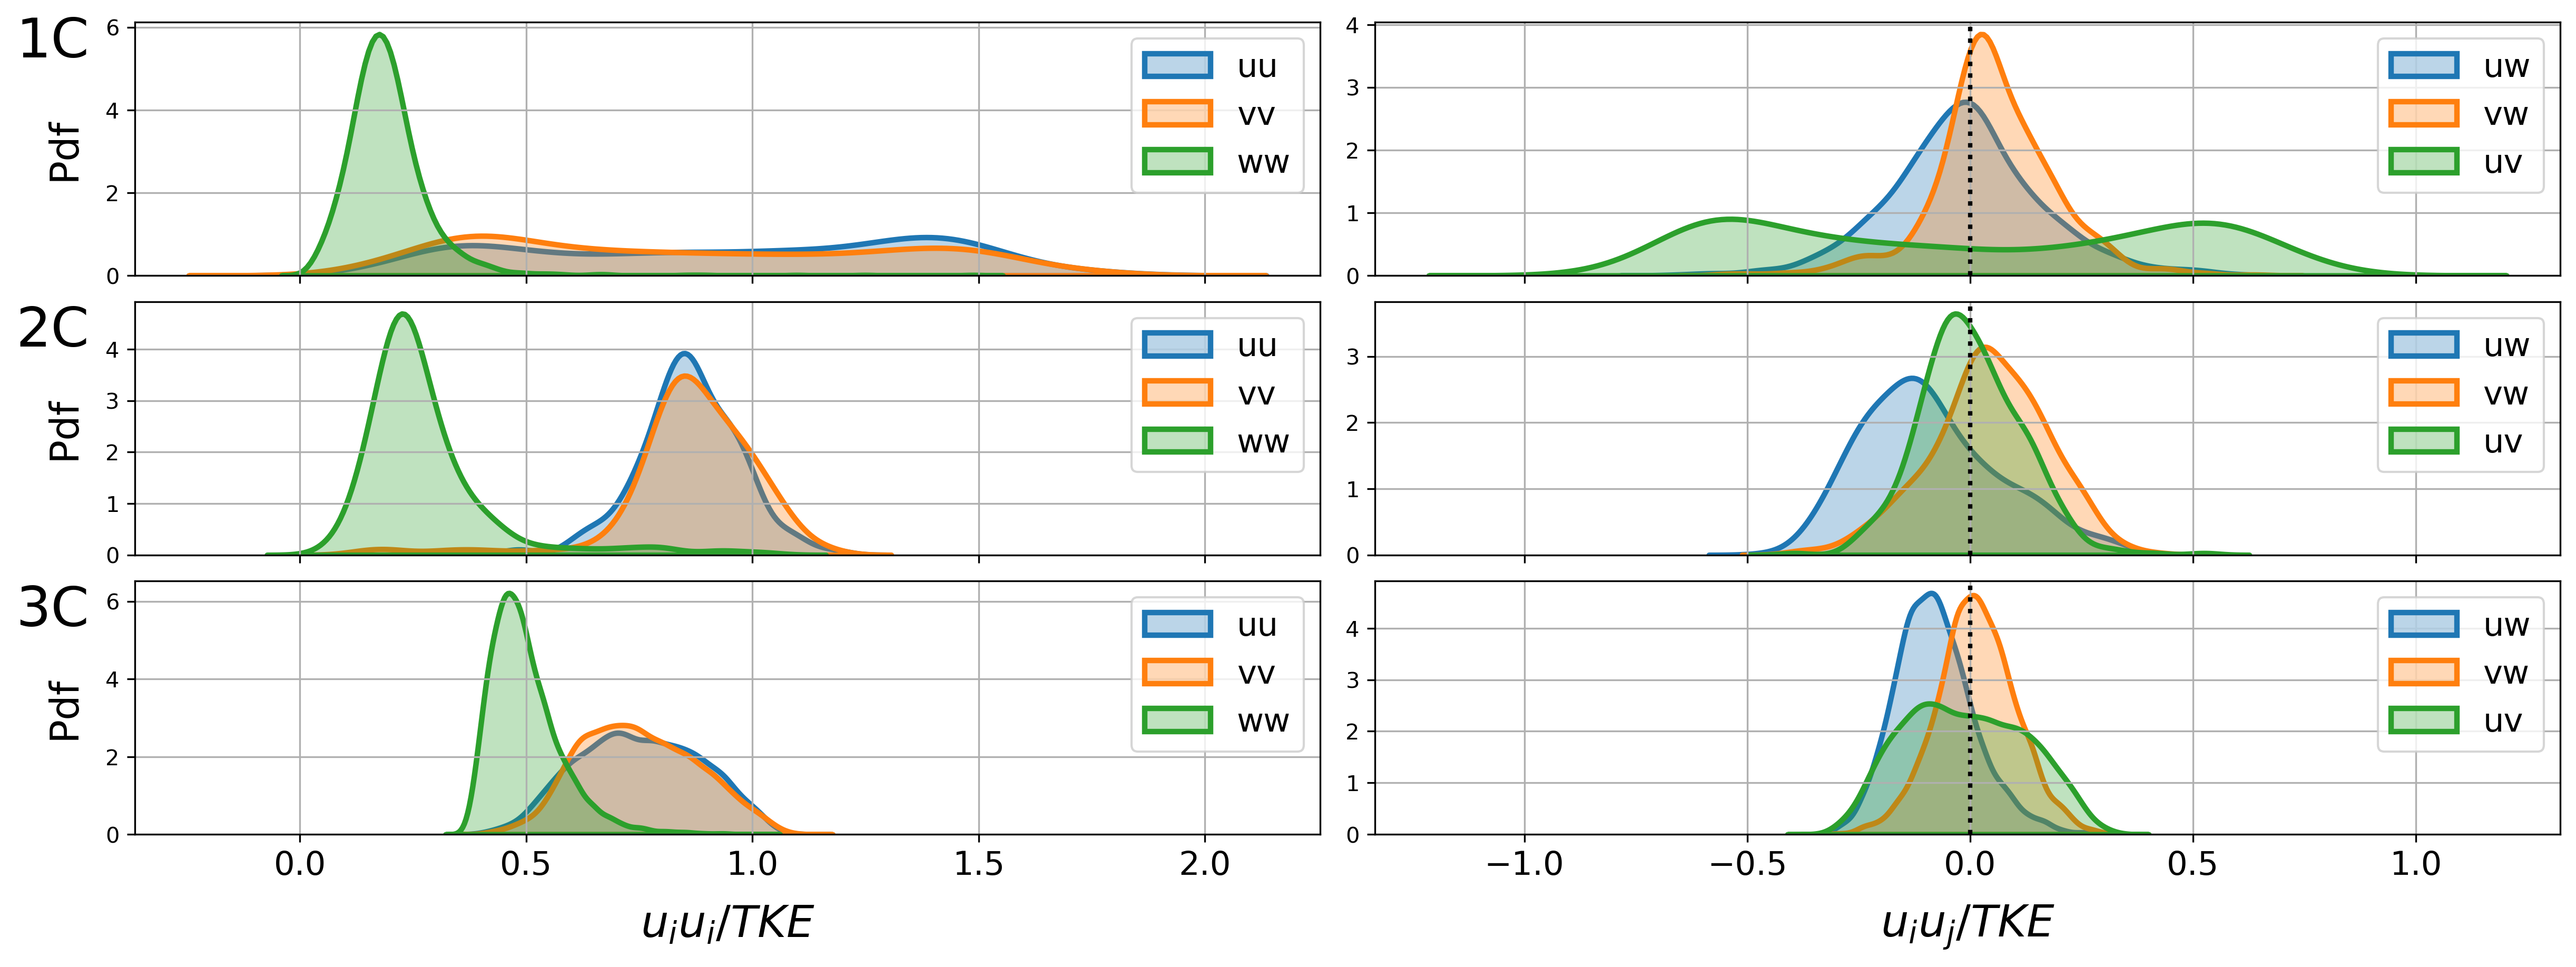

In [13]:
#Variances and covariances statistics
fig, ax = plt.subplots(3,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c,ds_2c,ds_3c], ['1C', '2C', '3C']):
    ds = ds.stack(index=('time','heights')).reset_index('index')
    
    #densities
    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[0], label = var, fill = True, linewidth = 2.5, alpha = 0.3)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[1], label = var, fill = True, linewidth = 2.5, alpha = 0.3)

 #labels and visuals
   # a[0].set_ylabel(label, fontsize = 20, rotation = 0, labelpad = 25)
    a[0].legend(fontsize = 15)
    a[0].set_ylabel('Pdf', fontsize = 18,rotation = 90,labelpad = 10)
    #a[0].set_ylim(0,10)
 
    a[1].legend(fontsize = 15)
    a[1].set_ylabel('')
    a[1].axvline(x = 0, color = 'black',linestyle= 'dotted', linewidth = 2)
    #a[1].set_ylim(0,10)
    # set xtick sizes
    for b in a:
        b.grid()
        for item in (b.get_xticklabels()):
            item.set_fontsize(15)
            
ax[-1,0].set_xlabel(r'$u_i u_i/TKE$', fontsize=20, labelpad = 10)
ax[-1,1].set_xlabel(r'$u_i u_j/TKE$', fontsize=20, labelpad = 10)

fig.text(0.02, 0.95, '1C', ha='right',fontsize=25)
fig.text(0.02, 0.645, '2C', ha='right',fontsize=25)
fig.text(0.02, 0.35, '3C', ha='right',fontsize=25)

### coriolis?

C:\Users\samue\AppData\Local\Temp\ipykernel_14424\4059444703.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=ds[var], ax=a[0], label = var, shade = True, linewidth = 2.5, alpha = 0.3, bw_adjust=0.05)
C:\Users\samue\AppData\Local\Temp\ipykernel_14424\4059444703.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=ds[var], ax=a[0], label = var, shade = True, linewidth = 2.5, alpha = 0.3, bw_adjust=0.05)
C:\Users\samue\AppData\Local\Temp\ipykernel_14424\4059444703.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=ds[var], ax=a[0], label = var, shade = True, linewidth = 2.5, alpha = 0.3, bw_adjust=0.05)
C:\Users\s

Text(0.02, 0.35, '3C')

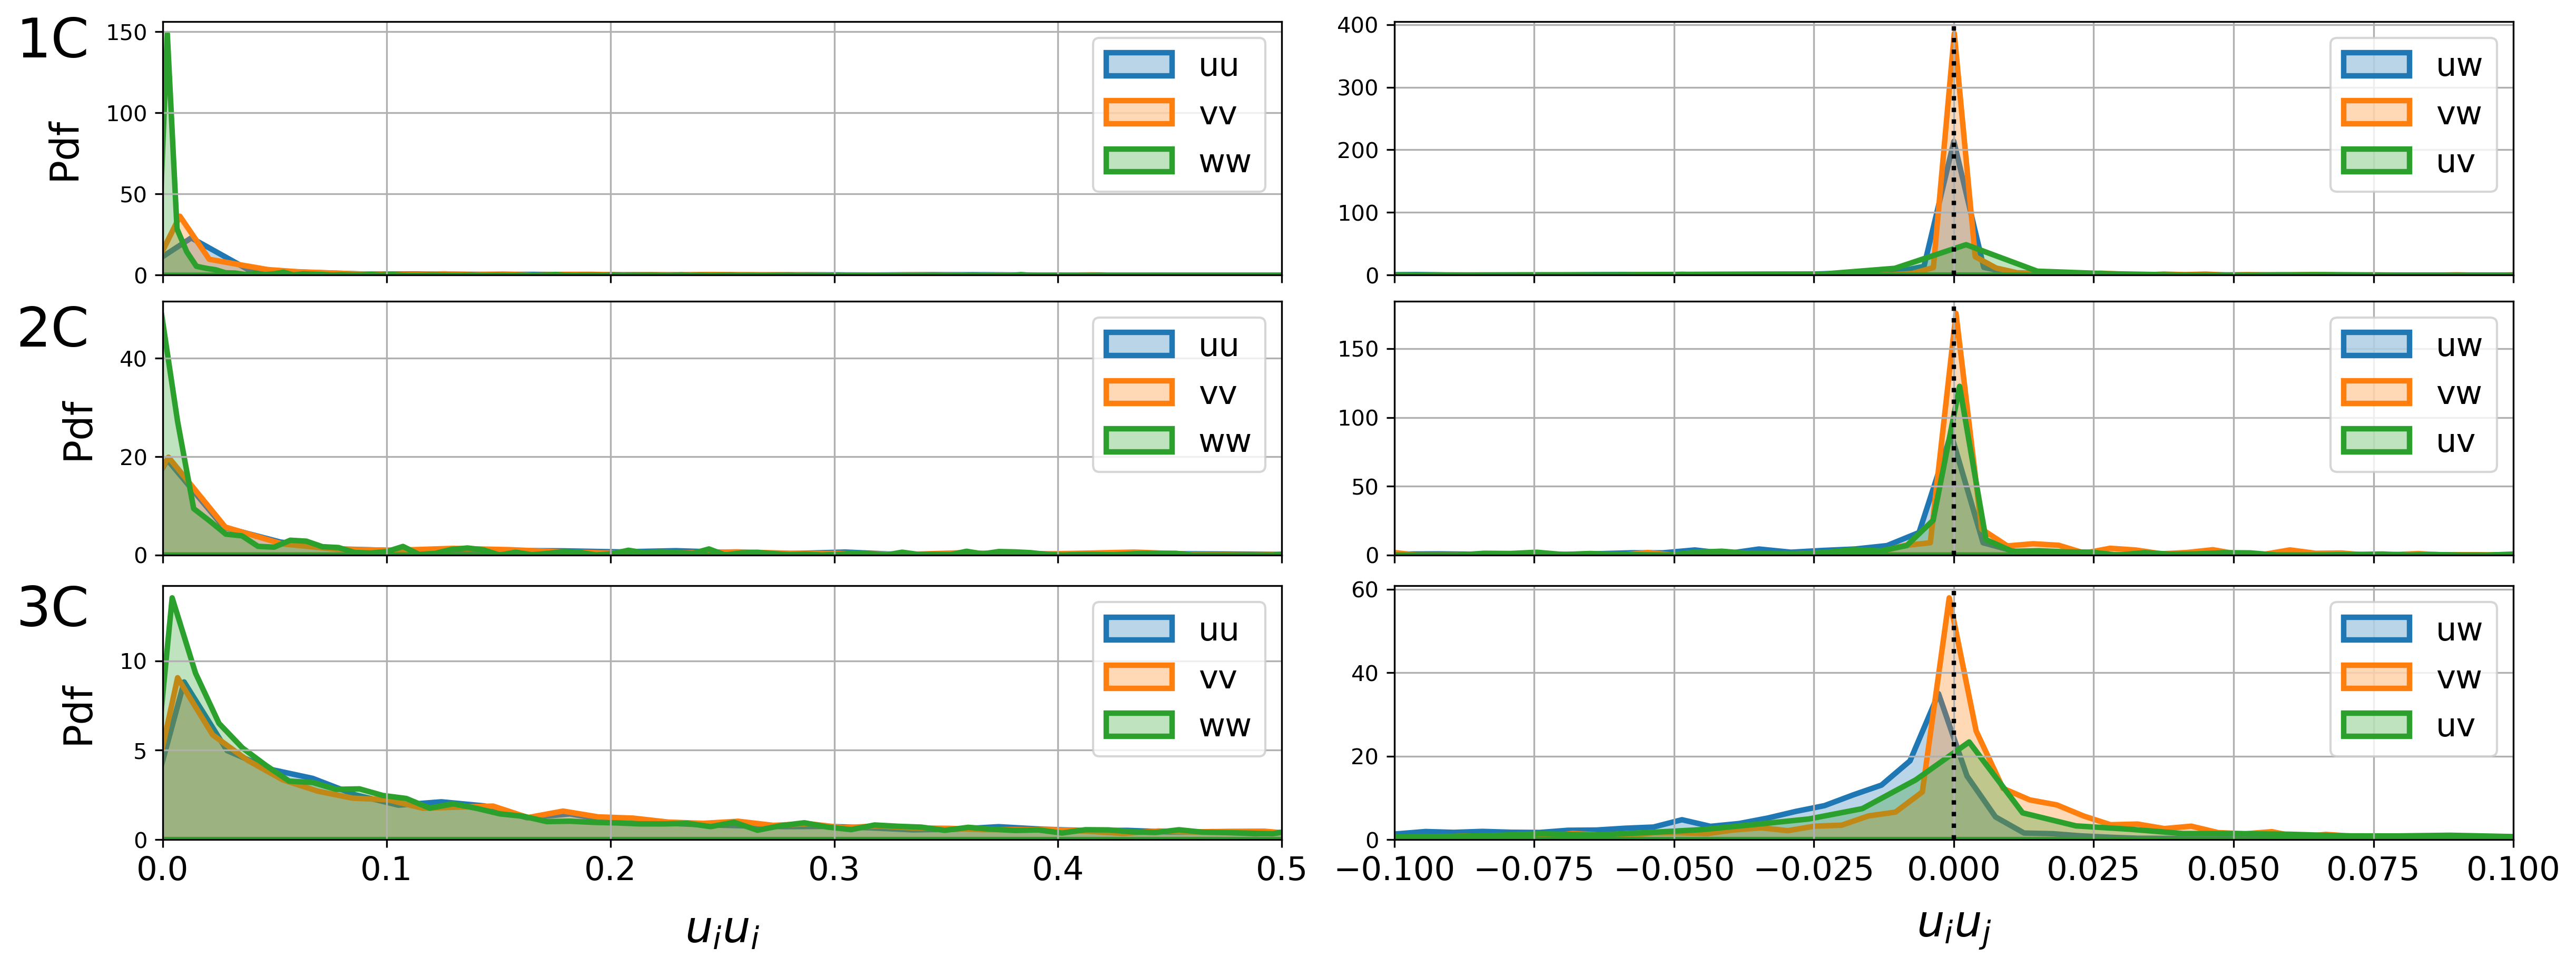

In [10]:
#Variances and covariances statistics
fig, ax = plt.subplots(3,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c,ds_2c,ds_3c], ['1C', '2C', '3C']):
    ds = ds.stack(index=('time','heights')).reset_index('index')
    
    #densities
    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var], ax=a[0], label = var, shade = True, linewidth = 2.5, alpha = 0.3, bw_adjust=0.05)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var], ax=a[1], label = var, shade = True, linewidth = 2.5, alpha = 0.3, bw_adjust=0.05)

 #labels and visuals
   # a[0].set_ylabel(label, fontsize = 20, rotation = 0, labelpad = 25)
    a[0].legend(fontsize = 15)
    a[0].set_ylabel('Pdf', fontsize = 18,rotation = 90,labelpad = 10)
    #a[0].set_ylim(0,10)
 
    a[1].legend(fontsize = 15)
    a[1].set_ylabel('')
    a[1].axvline(x = 0, color = 'black',linestyle= 'dotted', linewidth = 2)
    #a[1].set_ylim(0,10)
    # set xtick sizes
    for b in a:
        b.grid()
        for item in (b.get_xticklabels()):
            item.set_fontsize(15)
            
ax[-1,0].set_xlabel(r'$u_i u_i$', fontsize=20, labelpad = 10)
ax[-1,1].set_xlabel(r'$u_i u_j$', fontsize=20, labelpad = 10)

ax[-1,0].set_xlim([0,0.5])
ax[-1,1].set_xlim([-0.1,0.1])

fig.text(0.02, 0.95, '1C', ha='right',fontsize=25)
fig.text(0.02, 0.645, '2C', ha='right',fontsize=25)
fig.text(0.02, 0.35, '3C', ha='right',fontsize=25)

In [15]:
da = ds_1c.where((ds_1c.uv>0)&(ds_1c.uu>ds_1c.vv))

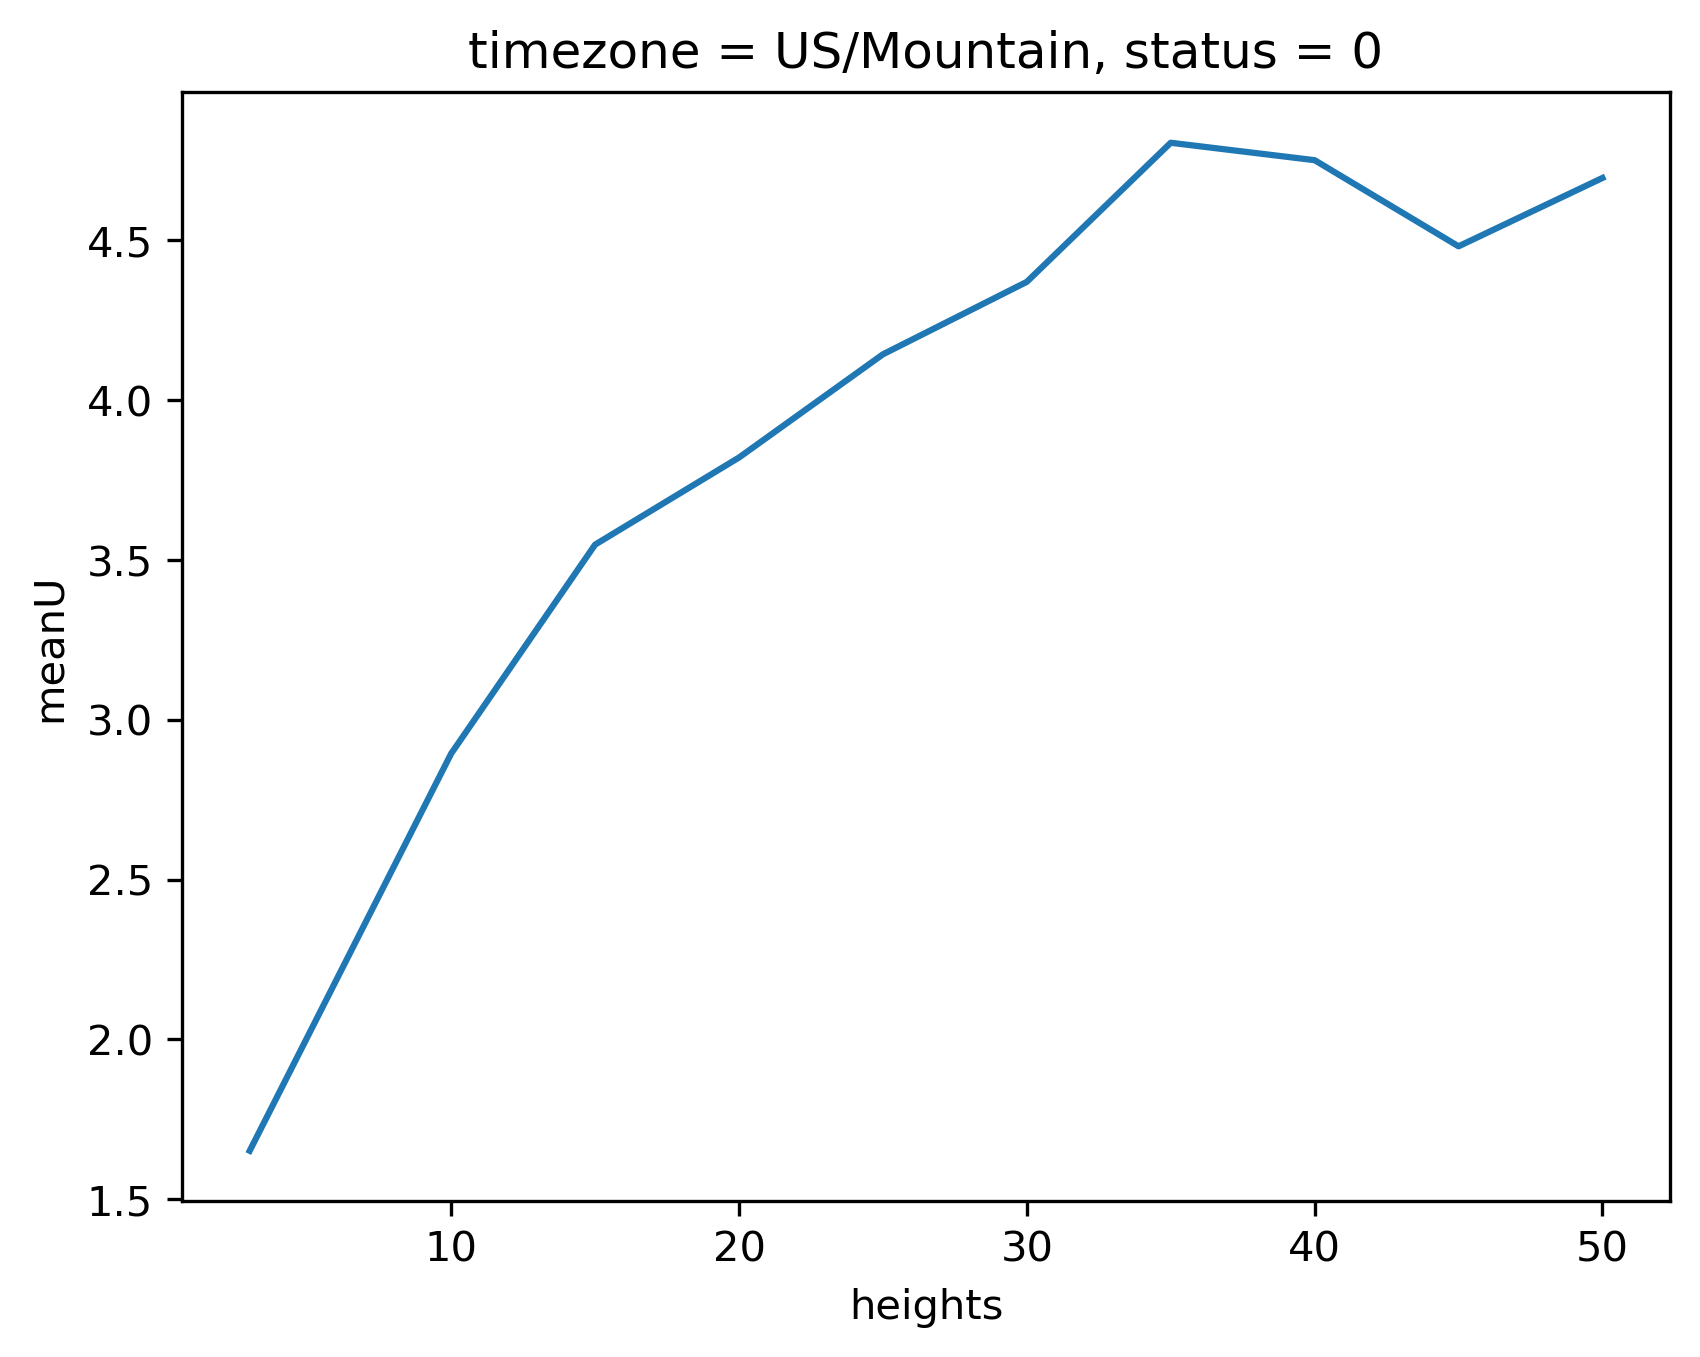

In [21]:
ds_1c.meanU.mean(dim='time').plot()

# aspect ratio

Text(0.5, 0, '$A_r$')

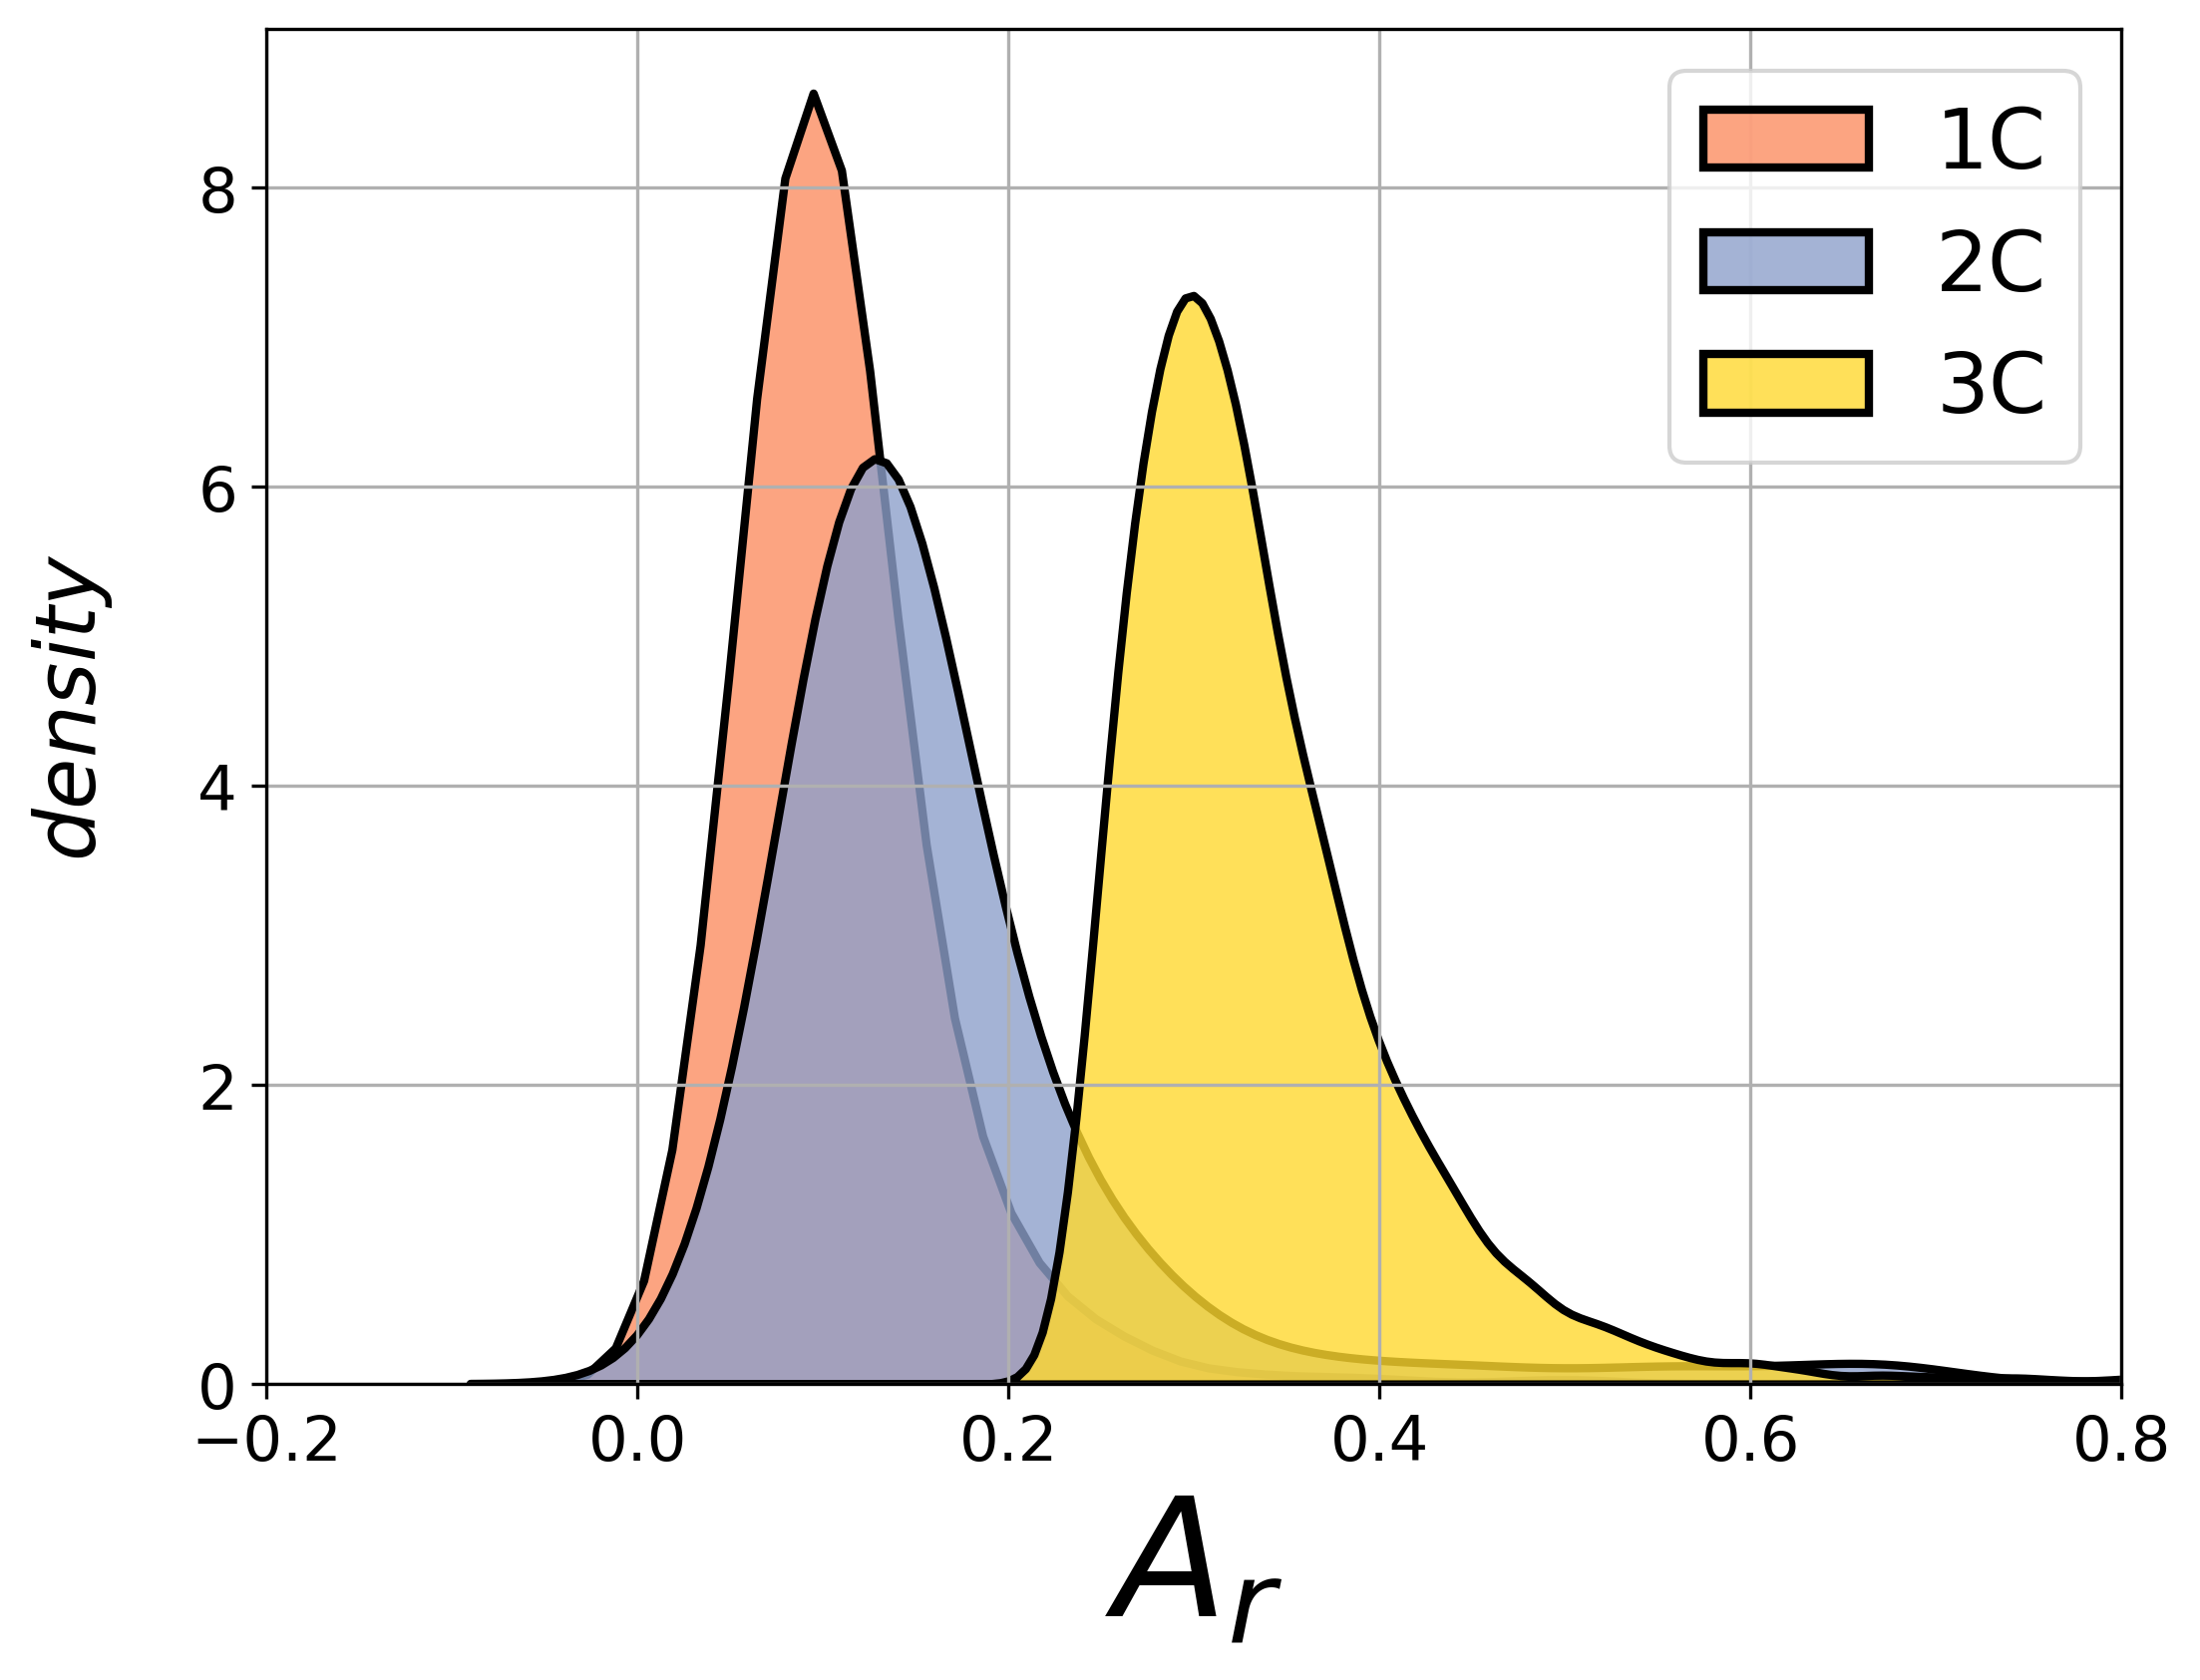

In [7]:
fig = plt.figure(figsize =(8,6))
ax = plt.gca()

for ds, c, label in zip([ds_1c,ds_2c,ds_3c], [color['red'],color['blue'],color['yellow']], ['1C', '2C', '3C']):
    ds = ds.stack(index=('time','heights')).reset_index('index')
    sns.kdeplot(ds.Ar, color = c, label = label, shade = True, edgecolor = 'black', alpha = 0.8, bw_adjust=1, linewidth = 2)
    
#visuals
ax.legend(fontsize = 20)
ax.grid() 
ax.set_xlim([-0.2,0.8])
# set xtick sizes
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
    
ax.set_ylabel(r'$density$', fontsize = 20, labelpad = 20)
ax.set_xlabel(r'$A_r$', fontsize = 40)


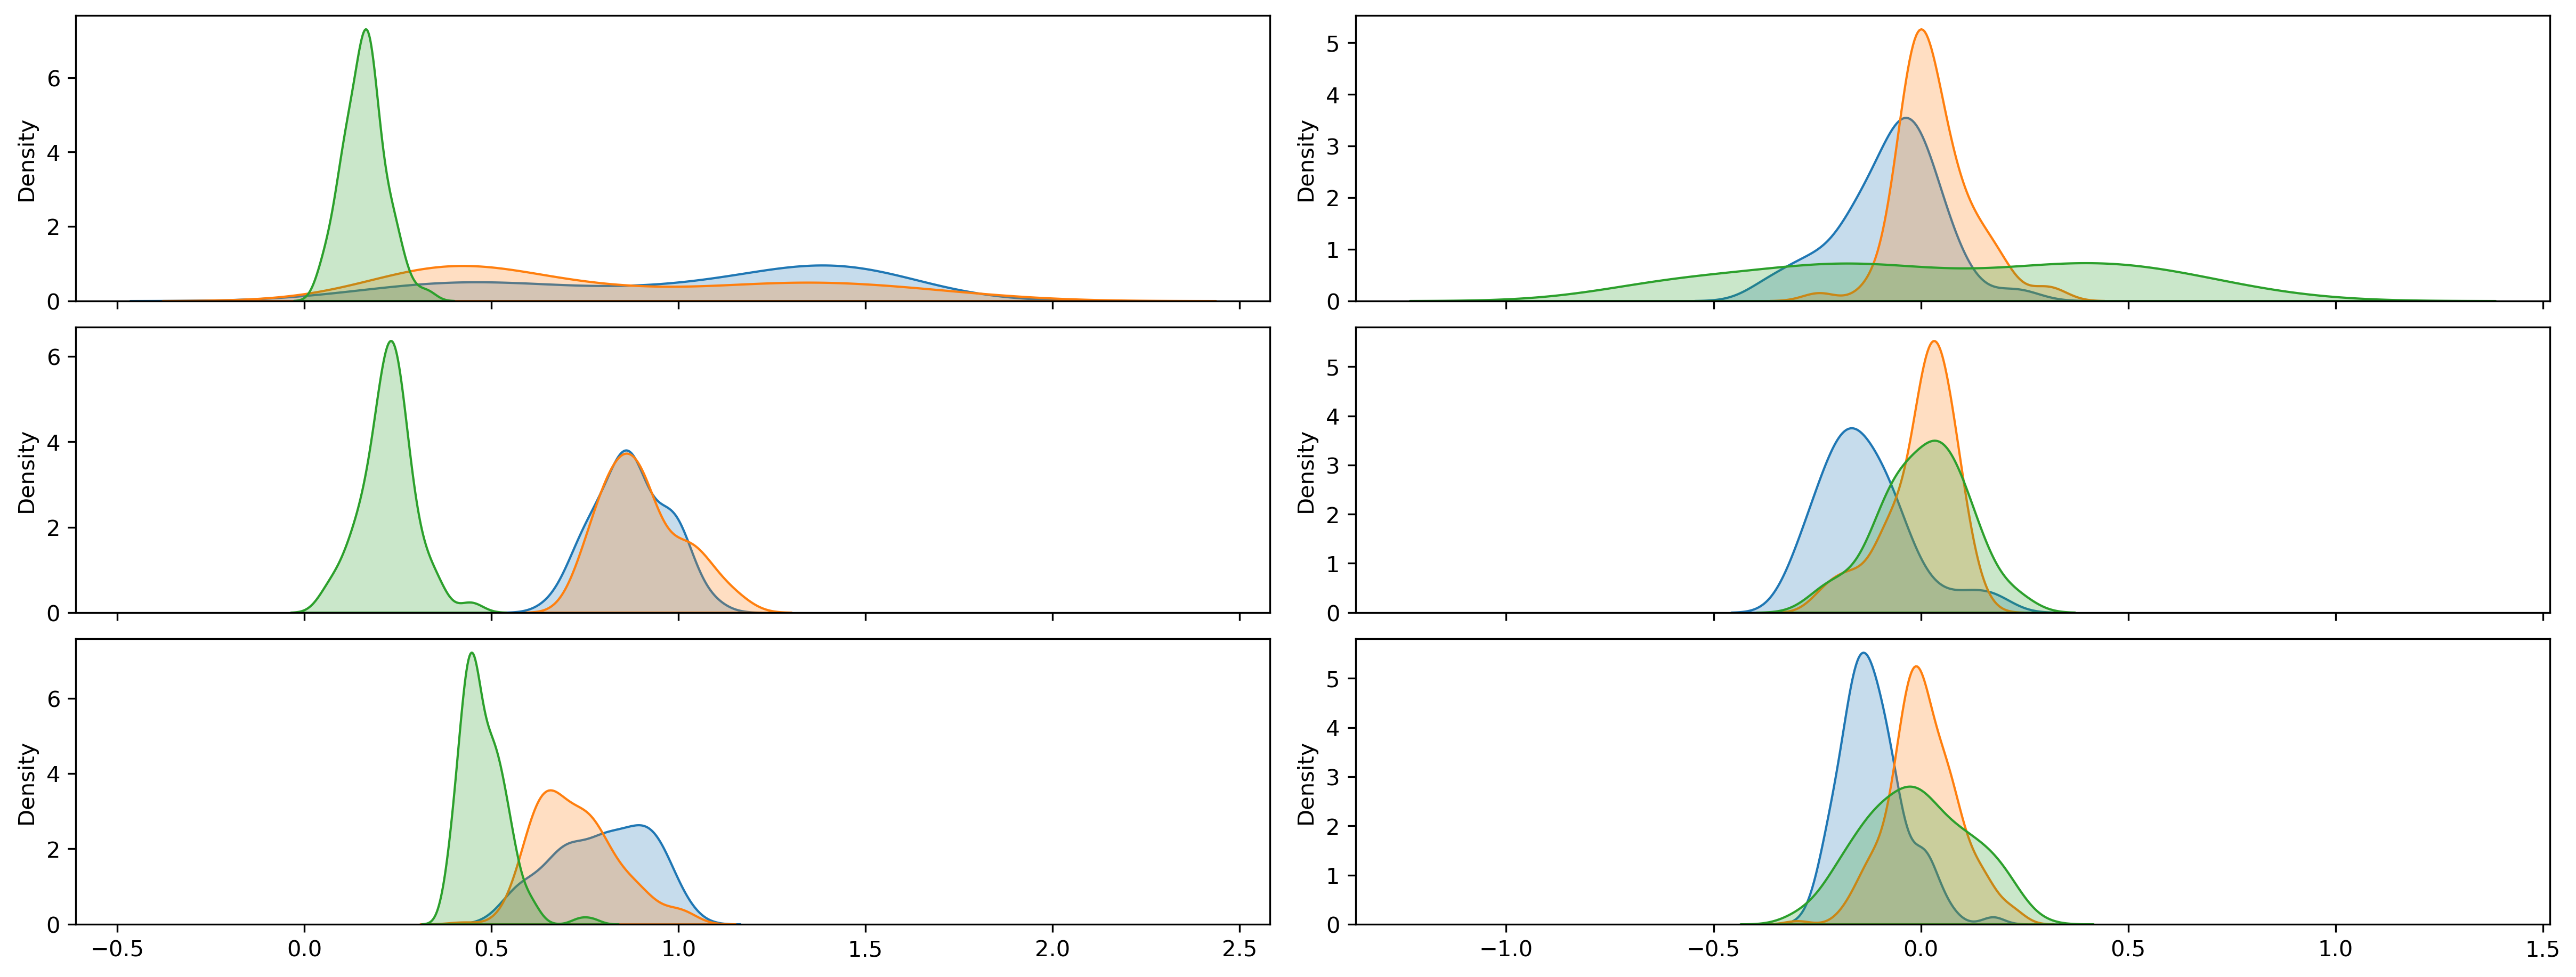

In [8]:
# same but only first height
ds_1c_h = ds_1c.isel(heights = 0)
ds_2c_h = ds_2c.isel(heights = 0)
ds_3c_h = ds_3c.isel(heights = 0)

#Variances and covariances statistics
fig, ax = plt.subplots(3,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c_h,ds_2c_h,ds_3c_h], ['1C', '2C', '3C']):
    #ds = ds.stack(index=('time')).reset_index('index')
    
    #densities
    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[0], label = var, shade = True)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[1], label = var, shade = True)
    
    #labels and visuals
#     a[0].set_ylabel(label, fontsize = 30, rotation = 0, labelpad = 30, loc = 'center')
#     a[0].legend(fontsize = 20)
#     a[1].legend(fontsize = 20)
#     a[1].set_ylabel('')
#     # set xtick sizes
#     for b in a:
#         for item in (b.get_xticklabels()):
#             item.set_fontsize(15)
    
#         b.tick_params(axis = 'y', left = False, labelleft=False)


 


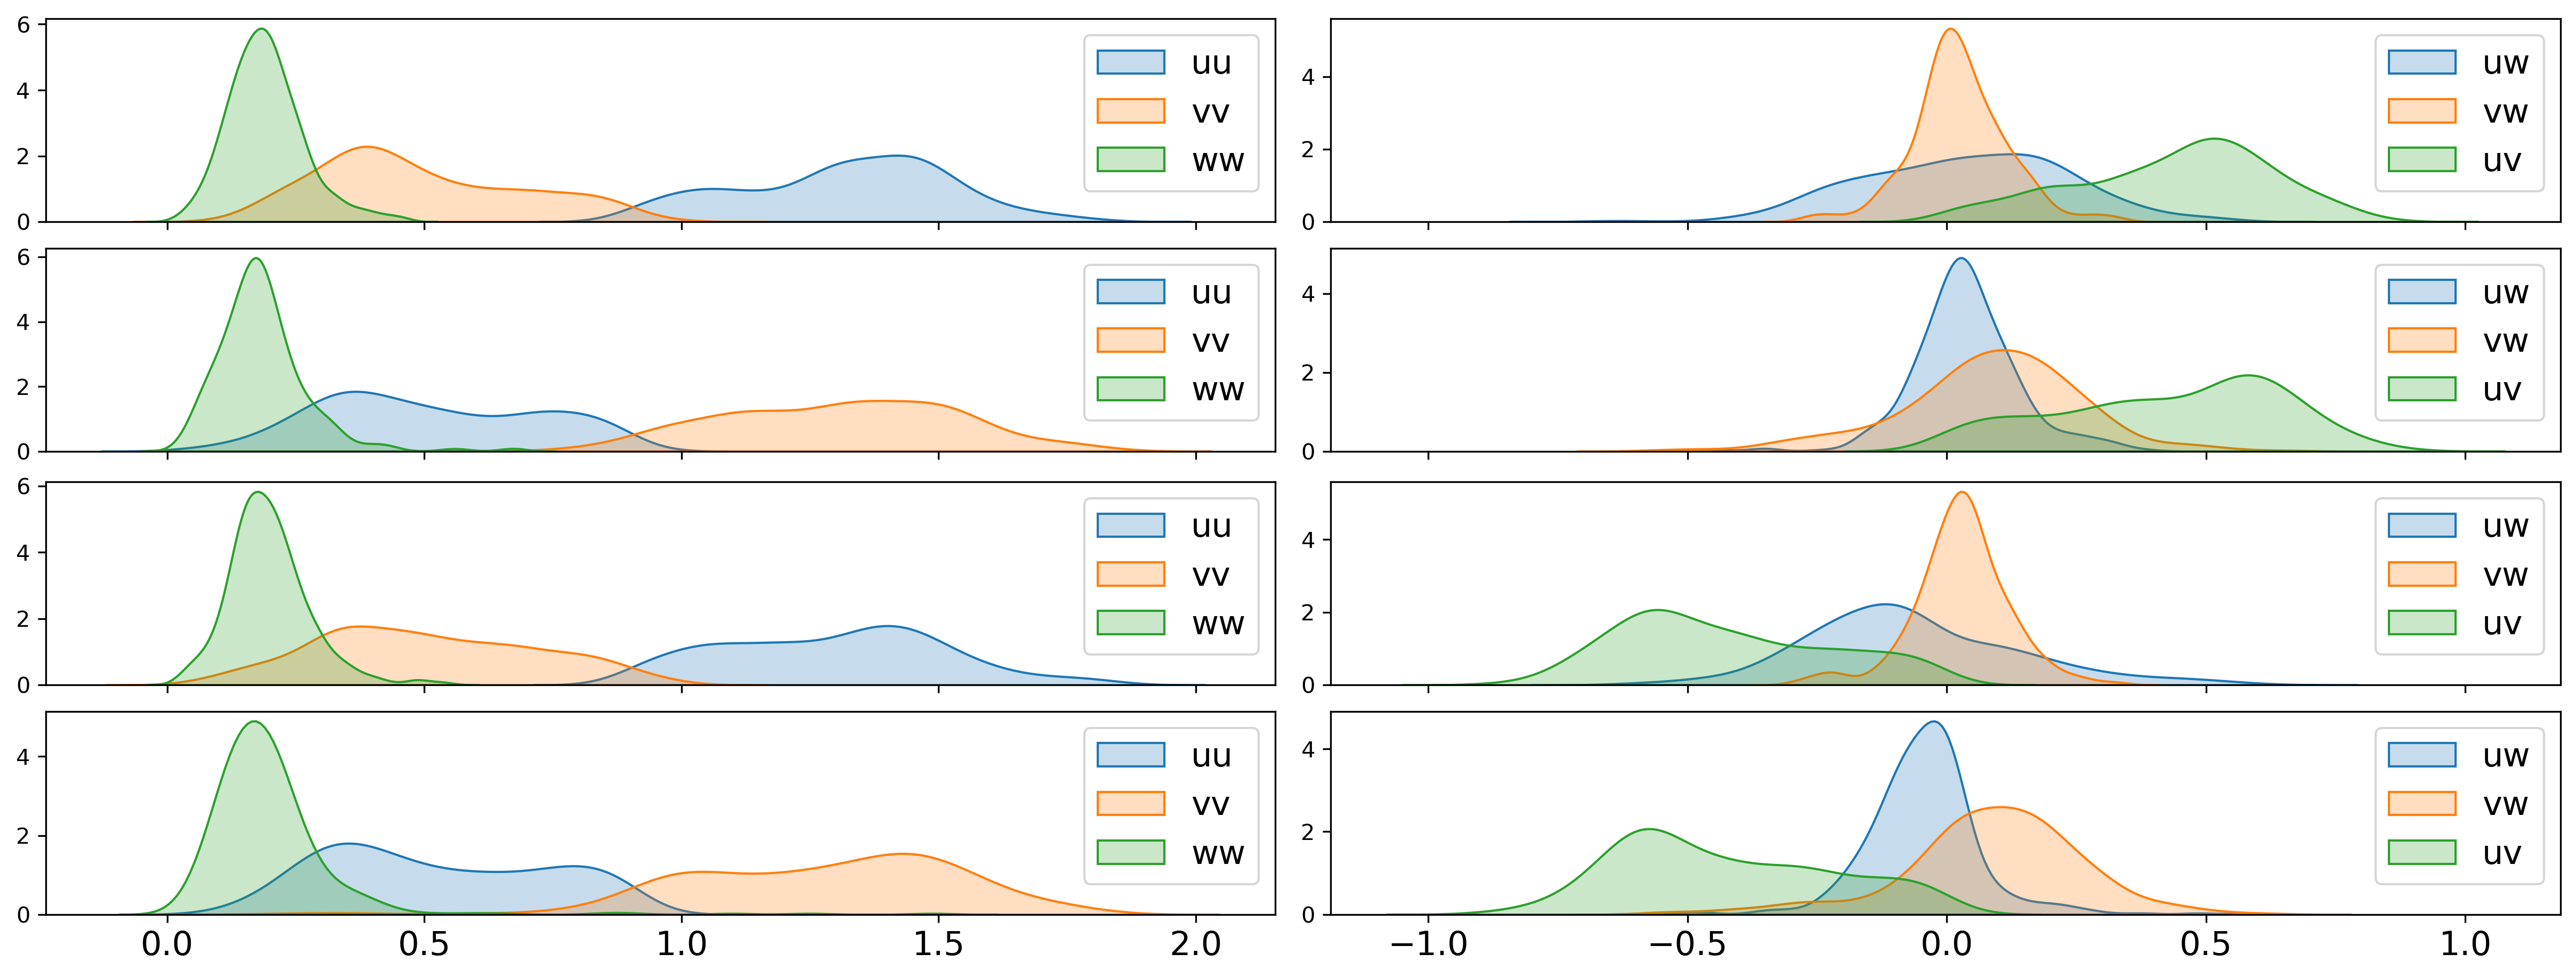

In [9]:
#stable one component peaks decomposition

ds_1c_p = ds_1c.where(ds_1c.uv >0, drop = True)
ds_1c_p0 = ds_1c_p.where(ds_1c_p.uu/ds_1c_p.tke >0.9, drop = True)
ds_1c_p1 = ds_1c_p.where(ds_1c_p.uu/ds_1c_p.tke <0.9, drop = True)

ds_1c_n = ds_1c.where(ds_1c.uv <0, drop = True)
ds_1c_n0 = ds_1c_n.where(ds_1c_n.uu/ds_1c_n.tke >0.9, drop = True)
ds_1c_n1 = ds_1c_n.where(ds_1c_n.uu/ds_1c_n.tke <0.9, drop = True)


# ds_1c_p = ds_1c.where(ds_1c.uu/ds_1c.tke >0.8, drop = True)
# ds_1c_p = ds_1c.where(ds_1c.uu/ds_1c.tke >0.8, drop = True)
#Variances and covariances statistics
fig, ax = plt.subplots(4,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c_p0, ds_1c_p1 , ds_1c_n0, ds_1c_n1], ['', '','', '']):
    ds = ds.stack(index=('time','heights')).reset_index('index')

    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[0], label = var, shade = True)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[1], label = var, shade = True)

    #labels and visuals
    a[0].set_ylabel(label, fontsize = 30, rotation = 0, labelpad = 25)
    a[0].legend(fontsize = 15)
    a[1].legend(fontsize = 15)
    a[1].set_ylabel('')
    
# set xtick sizes
for a in np.hstack(ax):
    for item in (a.get_xticklabels()):
        item.set_fontsize(15)
    
#ax[0].set_ylabel(r'$\beta$', fontsize = 30, rotation = 0)
# ax[0,0].set_xlim([-0.2,0.4])
# ax[0,1].set_xlim([-0.2,0.2])


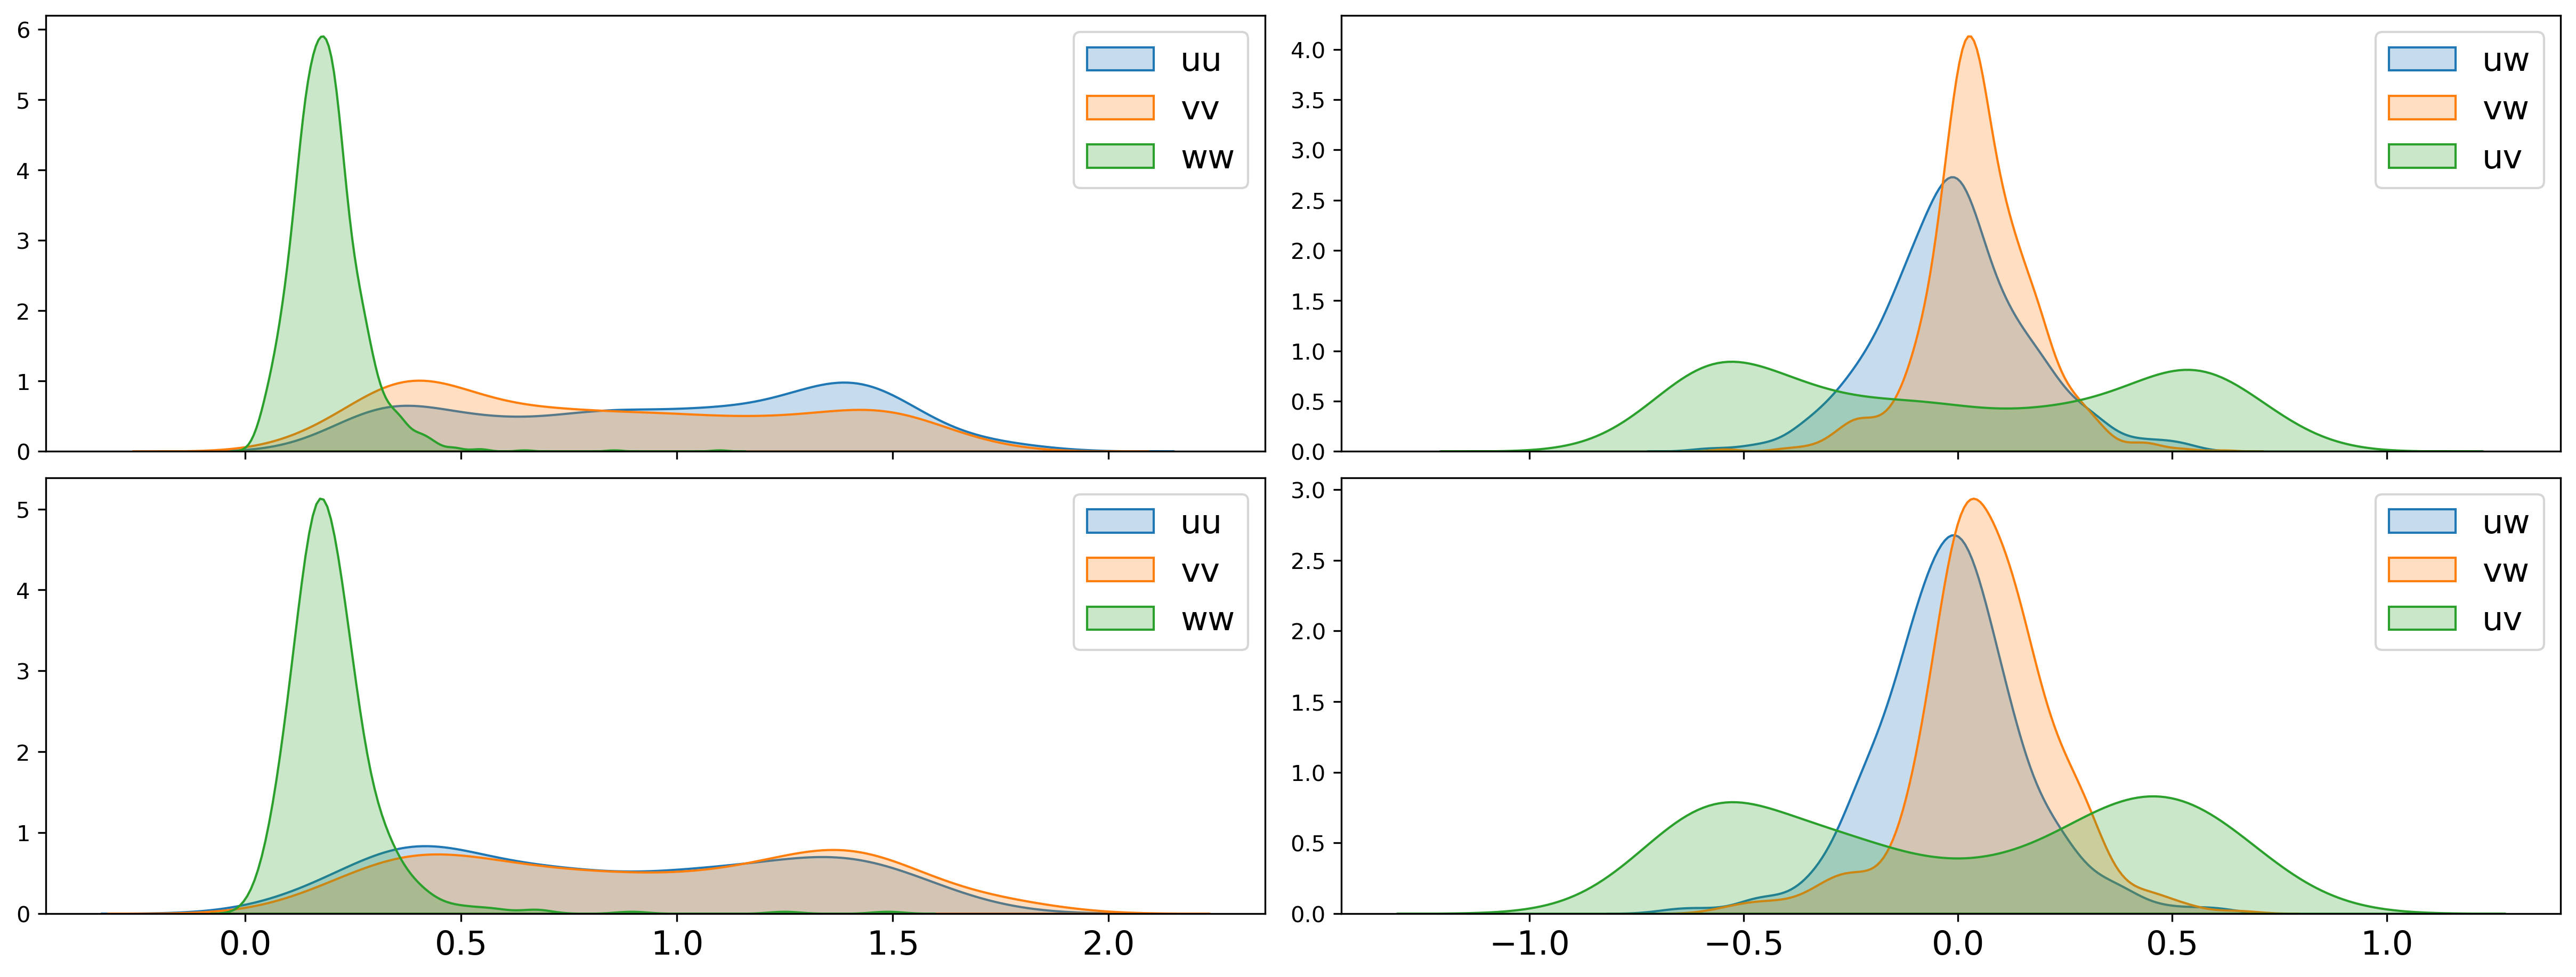

In [10]:
#stable one component peaks decomposition
w_tr = 3
ds_1c_hw = ds_1c.where(ds_1c.meanU>w_tr, drop = True)
ds_1c_lw = ds_1c.where(ds_1c.meanU<w_tr, drop = True)



# ds_1c_p = ds_1c.where(ds_1c.uu/ds_1c.tke >0.8, drop = True)
# ds_1c_p = ds_1c.where(ds_1c.uu/ds_1c.tke >0.8, drop = True)
#Variances and covariances statistics
fig, ax = plt.subplots(2,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c_hw, ds_1c_lw], ['', '']):
    ds = ds.stack(index=('time','heights')).reset_index('index')

    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[0], label = var, shade = True)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[1], label = var, shade = True)

    #labels and visuals
    a[0].set_ylabel(label, fontsize = 30, rotation = 0, labelpad = 25)
    a[0].legend(fontsize = 15)
    a[1].legend(fontsize = 15)
    a[1].set_ylabel('')
    
# set xtick sizes
for a in np.hstack(ax):
    for item in (a.get_xticklabels()):
        item.set_fontsize(15)
    
#ax[0].set_ylabel(r'$\beta$', fontsize = 30, rotation = 0)
# ax[0,0].set_xlim([-0.2,0.4])
# ax[0,1].set_xlim([-0.2,0.2])


# Unstable conditions

In [11]:
ds_1c = xr.open_dataset('Metcrax_unstable_1c.nc')
ds_2c = xr.open_dataset('Metcrax_unstable_2c.nc')
ds_3c = xr.open_dataset('Metcrax_unstable_3c.nc')

Text(0.02, 0.35, '3C')

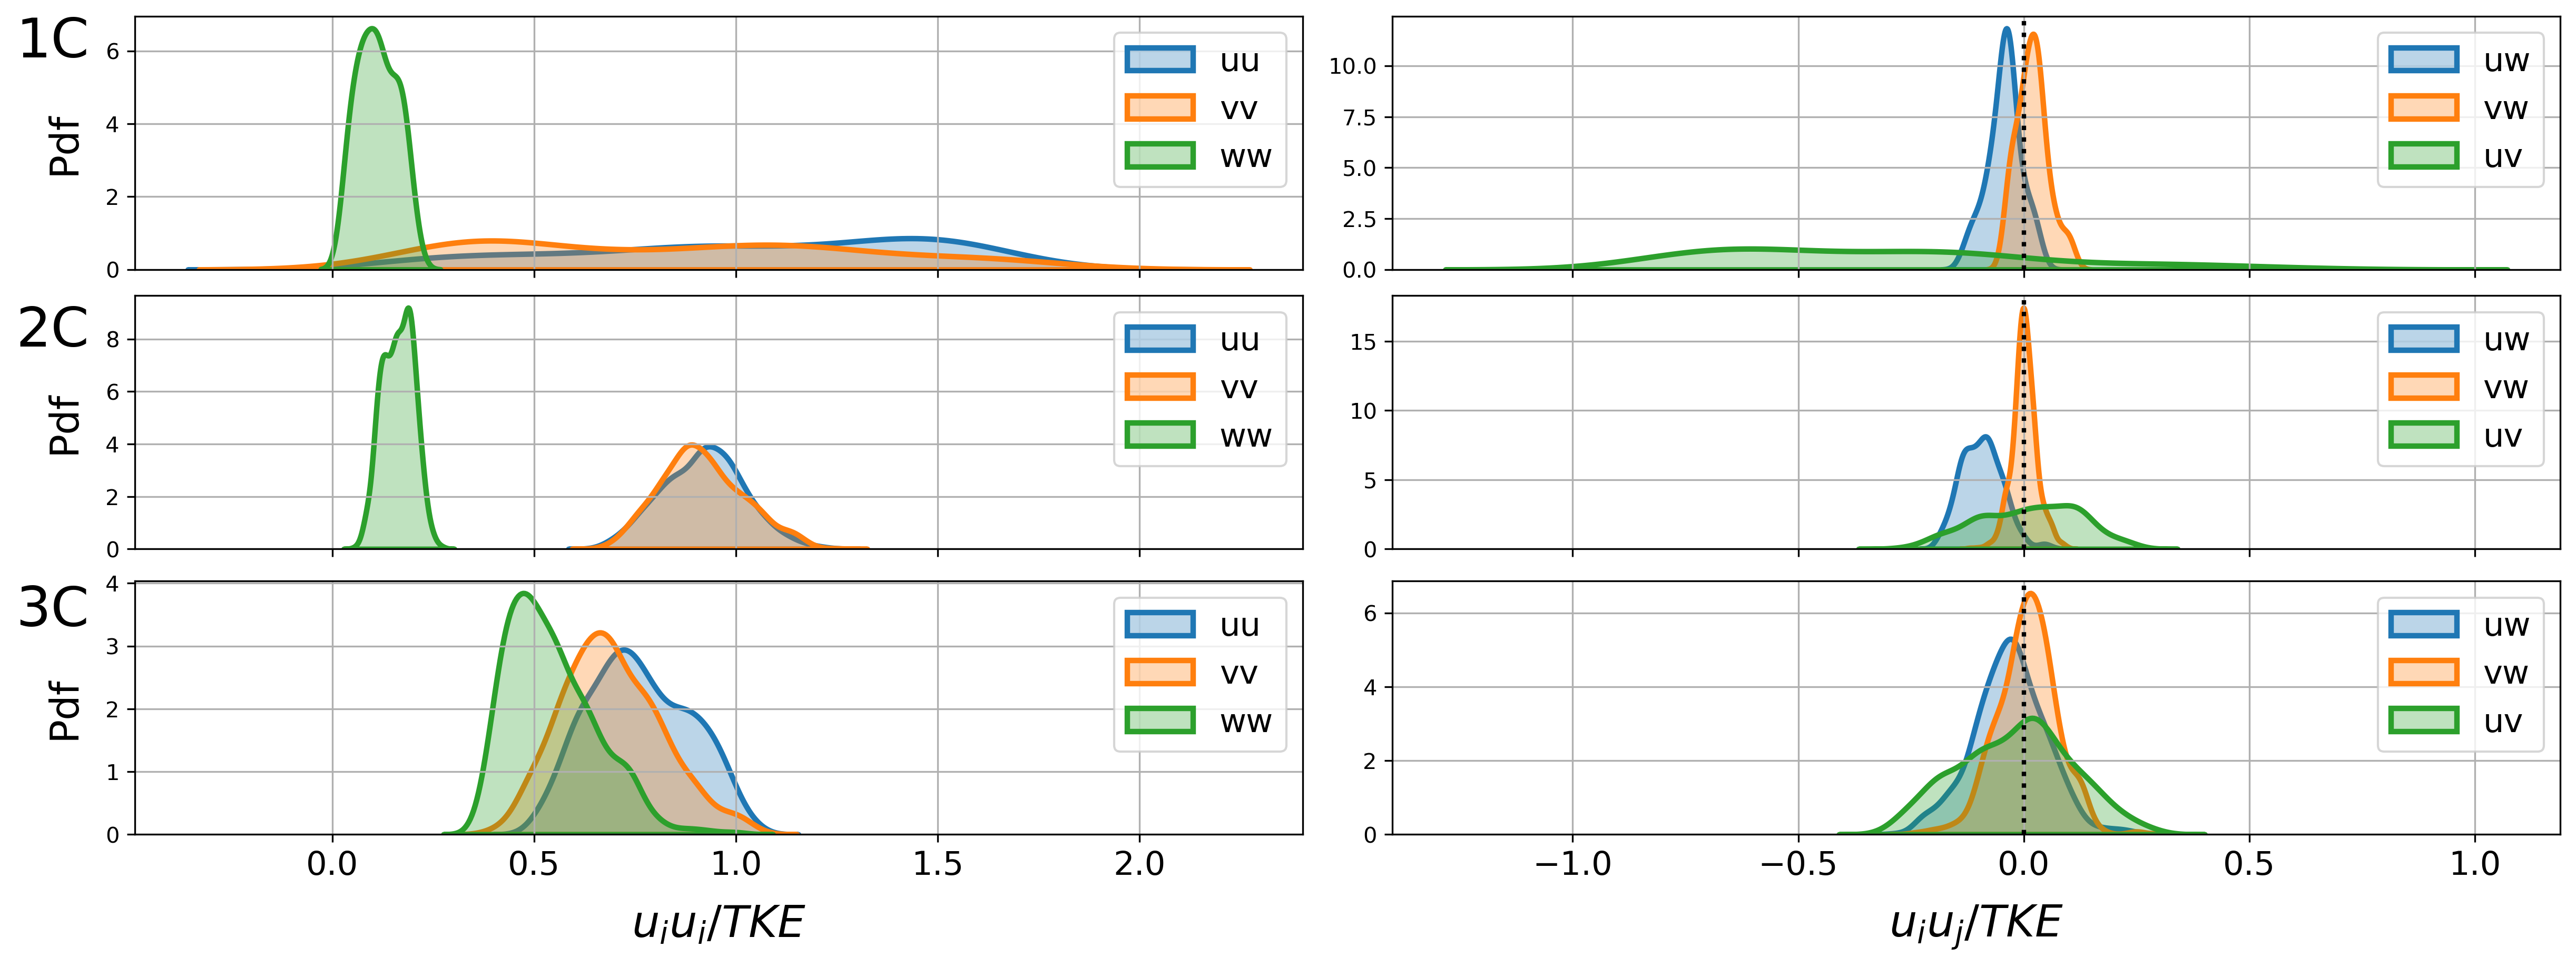

In [12]:
#Variances and covariances statistics
fig, ax = plt.subplots(3,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c,ds_2c,ds_3c], ['1C', '2C', '3C']):
    ds = ds.stack(index=('time','heights')).reset_index('index')
    
    #densities
    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[0], label = var, shade = True, linewidth = 2.5, alpha = 0.3)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[1], label = var, shade = True, linewidth = 2.5, alpha = 0.3)

 #labels and visuals
   # a[0].set_ylabel(label, fontsize = 20, rotation = 0, labelpad = 25)
    a[0].legend(fontsize = 15)
    a[0].set_ylabel('Pdf', fontsize = 18,rotation = 90,labelpad = 10)
    #a[0].set_ylim(0,10)
 
    a[1].legend(fontsize = 15)
    a[1].set_ylabel('')
    a[1].axvline(x = 0, color = 'black',linestyle= 'dotted', linewidth = 2)
    #a[1].set_ylim(0,10)
    # set xtick sizes
    for b in a:
        b.grid()
        for item in (b.get_xticklabels()):
            item.set_fontsize(15)
            
ax[-1,0].set_xlabel(r'$u_i u_i/TKE$', fontsize=20, labelpad = 10)
ax[-1,1].set_xlabel(r'$u_i u_j/TKE$', fontsize=20, labelpad = 10)

fig.text(0.02, 0.95, '1C', ha='right',fontsize=25)
fig.text(0.02, 0.645, '2C', ha='right',fontsize=25)
fig.text(0.02, 0.35, '3C', ha='right',fontsize=25)

In [13]:
ds_1c= pd.read_csv('all_Rey_1c.csv')
ds_2c = pd.read_csv('all_Rey_2c.csv')
ds_3c = pd.read_csv('all_Rey_3c.csv')

Text(0.02, 0.35, '3C')

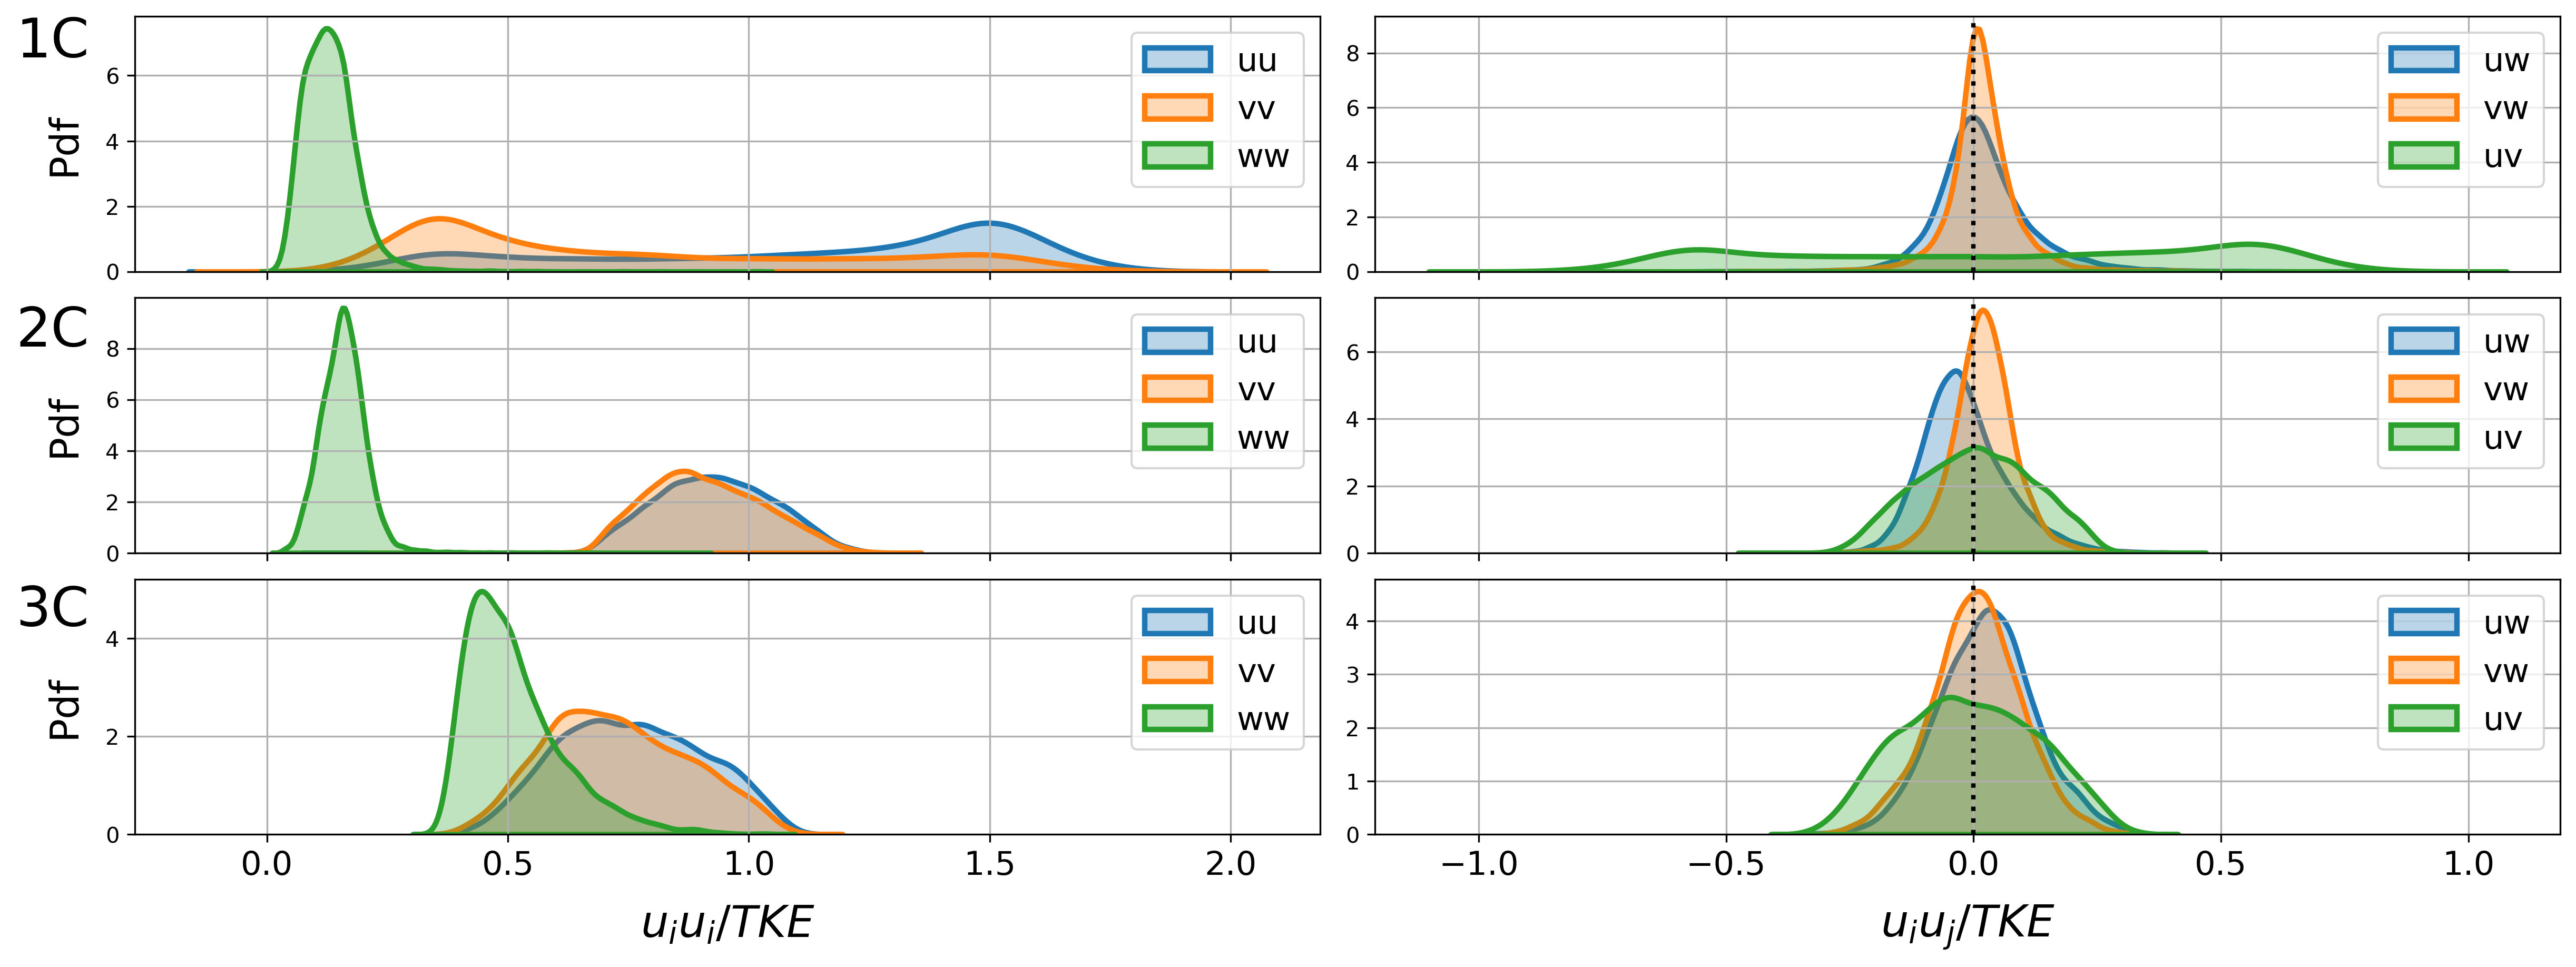

In [14]:
#Variances and covariances statistics
fig, ax = plt.subplots(3,2, figsize =(16,6), constrained_layout = True, sharex = 'col')

for a, ds, label in zip(ax, [ds_1c,ds_2c,ds_3c], ['1C', '2C', '3C']):
    #ds = ds.stack(index=('time','heights')).reset_index('index')
    
    #densities
    for var in ['uu','vv', 'ww']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[0], label = var, shade = True, linewidth = 2.5, alpha = 0.3)
    
    for var in ['uw','vw', 'uv']:
        sns.kdeplot(x=ds[var]/ds.tke, ax=a[1], label = var, shade = True, linewidth = 2.5, alpha = 0.3)

 #labels and visuals
   # a[0].set_ylabel(label, fontsize = 20, rotation = 0, labelpad = 25)
    a[0].legend(fontsize = 15)
    a[0].set_ylabel('Pdf', fontsize = 18,rotation = 90,labelpad = 10)
    #a[0].set_ylim(0,10)
 
    a[1].legend(fontsize = 15)
    a[1].set_ylabel('')
    a[1].axvline(x = 0, color = 'black',linestyle= 'dotted', linewidth = 2)
    #a[1].set_ylim(0,10)
    # set xtick sizes
    for b in a:
        b.grid()
        for item in (b.get_xticklabels()):
            item.set_fontsize(15)
            
ax[-1,0].set_xlabel(r'$u_i u_i/TKE$', fontsize=20, labelpad = 10)
ax[-1,1].set_xlabel(r'$u_i u_j/TKE$', fontsize=20, labelpad = 10)

#adjust 2c var pdf label by changing ylim
ax[1,0].set_ylim([0,9.99])

fig.text(0.02, 0.95, '1C', ha='right',fontsize=25)
fig.text(0.02, 0.645, '2C', ha='right',fontsize=25)
fig.text(0.02, 0.35, '3C', ha='right',fontsize=25)